<img src='https://i.imgur.com/RDAD11M.png' width = '200' align = 'right'>

# **SC13x** 

# **Linear Algebra**

## **Part 1. Linear Algebra**

### **1-1. 벡터의 내적**

\begin{align}
\vec{c} = \begin{bmatrix}3 & 7 & -2 & 12\end{bmatrix}
\qquad
\vec{d} = \begin{bmatrix}9 & -7 & 4 & 6\end{bmatrix}
\end{align}

</br>

- $\vec{c} \cdot \vec{d}$ 를 구해보세요. 
- 이 두 개의 vector가 orthogonal 관계 (직교)에 있는지 확인해보세요.

##### **Q1. 두 벡터 c, d가 orthogonal 관계(직교)에 있다면 왜 그런지, 아니라면 왜 아닌지 쓰세요.**

In [ ]:
import numpy as np

# vector c, d 선언
c = np.array([3,7,-2,12])
d = np.array([9,-7,4,6])

print(f"벡터 c와 d의 내적: {np.dot(c,d)}")

벡터 c와 d의 내적: 42


### **1-2. 행렬의 연산**


\begin{align}
E = 
\begin{bmatrix}
    7 & 4 & 2 \\
    1 & 3 & -1 \\
    2 & 6 & -4
\end{bmatrix}
\end{align}

</br>

- $E^{-1}$, $E^T$을 구하세요.





##### **Q2. $E^{-1}$의 첫번째 row의 합을 반올림하여 소수점 둘째 자리까지 구한 값과 $E^T$의 첫번째 row의 합을 튜플 형태로 쓰세요. ex) (0.12, 22)** 

In [ ]:
# 행렬 E 선언
E = np.array([[7,4,2],
              [1,3,-1],
              [2,6,-4]])

# 역행렬
e_inv = np.linalg.inv(E)
print(f"Inverse of E: \n {e_inv} \n")

# 전치행렬
e_t = np.transpose(E)
print(f"Transpose of E: \n {e_t}\n")

round(e_inv[0].sum(), 2), e_t[0].sum()

Inverse of E: 
 [[ 0.17647059 -0.82352941  0.29411765]
 [-0.05882353  0.94117647 -0.26470588]
 [ 0.          1.         -0.5       ]] 

Transpose of E: 
 [[ 7  1  2]
 [ 4  3  6]
 [ 2 -1 -4]]



(-0.35, 10)

### **1-3. Determinant**

행렬 $F$ 를 활용하여 다음 `Q3` 질문에 답해봅니다.

</br>

\begin{align}
F = 
\begin{bmatrix}
    2 & -2 & 5 \\
    4 & 1 & 10 \\
    12 & 6 & 30
\end{bmatrix}
\end{align}



 



##### **Q3. $det F$ 값을 바탕으로 행렬 $F$ 에는 어떤 의미가 있는지 쓰세요.**

In [ ]:
# numpy의 메소드로 Determinant 계산
F = np.array([[2,-2,5],
              [4,1,10],
              [12,6,30]])

print(np.linalg.det(F))  

0.0


In [ ]:
np.linalg.matrix_rank(F) 

2

## **Part 2. PCA**

### **2-1. Covariance & Correlation**

- 다음 표를 보고 `S&P 500`과 `ABC Corp.`의 공분산과 상관계수를 구하세요.

  <img src='https://i.imgur.com/QBCt8yx.png' width=500>

##### **Q4. 공분산과 상관계수를 각각 반올림하여 소수점 둘째 자리까지 구하여 (공분산, 상관계수)의 형태로 쓰세요.** 

In [ ]:
sp500 = [1692, 1978, 1884, 2151, 2519]
abc = [68, 102, 110, 112, 154]

cov = round(np.cov(sp500, abc)[0][1], 2)
corr = round(np.corrcoef(sp500, abc)[0][1], 2)

cov, corr

(9107.3, 0.95)

### **2-2. PCA**




#### **2-2-a. 데이터 표준화** 

- `Country` column을 `country` 라는 변수에 저장하세요.
- 다음 [링크](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)를 참고하여 `df`의 numerical columns에 대해 표준화를 진행하세요.




##### **Q5. 표준화 한 후, `Sugars` column의 index가 0인 값을 반올림하여 소수점 둘째 자리까지 구하세요.**

In [ ]:
import pandas as pd

data = {"Country": ["England","Wales","Scotland","North Ireland"], 
        "Cheese": [105,103,103,66], 
        "Carcass_Meat": [245,227,242,267], 
        "Other_Meat": [685, 803, 750, 586], 
        "Fish": [147, 160, 122, 93], 
        "Fats_and_Oils": [193, 235, 184, 209], 
        "Sugars": [156, 175, 147, 139], 
        "Fresh_Potatoes": [720, 874, 566, 1033], 
        "Fresh_Veg": [253, 265, 171, 143], 
        "Other_Veg": [488, 570, 418, 355], 
        "Processed_Potatoes": [198, 203, 220, 187], 
        "Processed_Veg": [360, 365, 337, 334], 
        "Fresh_Fruit": [1102, 1137, 957, 674], 
        "Cereals": [1472, 1582, 1462, 1494], 
        "Beverages": [57,73,53,47], 
        "Soft_Drinks": [1374, 1256, 1572, 1506], 
        "Alcoholic Drinks": [375, 475, 458, 135], 
        "Confectionery": [54, 64, 62, 41]}

df = pd.DataFrame(data)

df

,Country,Cheese,Carcass_Meat,Other_Meat,Fish,Fats_and_Oils,Sugars,Fresh_Potatoes,Fresh_Veg,Other_Veg,Processed_Potatoes,Processed_Veg,Fresh_Fruit,Cereals,Beverages,Soft_Drinks,Alcoholic Drinks,Confectionery
0,England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
1,Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
2,Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
3,North Ireland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


In [ ]:
# Country column의 데이터를 country라는 변수에 저장합니다
country = df['Country']

In [ ]:
# 정규화에 사용할 칼럼만 리스트로 만듭니다
scaled_cols = df.columns.drop('Country')
scaled_cols

Index(['Cheese', 'Carcass_Meat', 'Other_Meat', 'Fish', 'Fats_and_Oils',
       'Sugars', 'Fresh_Potatoes', 'Fresh_Veg', 'Other_Veg',
       'Processed_Potatoes', 'Processed_Veg', 'Fresh_Fruit', 'Cereals',
       'Beverages', 'Soft_Drinks', 'Alcoholic Drinks', 'Confectionery'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer  # https://stackoverflow.com/questions/38420847/apply-standardscaler-to-parts-of-a-data-set

# option 1) StandardScaler
scaler = StandardScaler()
df[scaled_cols] = scaler.fit_transform(df[scaled_cols])
df

,Country,Cheese,Carcass_Meat,Other_Meat,Fish,Fats_and_Oils,Sugars,Fresh_Potatoes,Fresh_Veg,Other_Veg,Processed_Potatoes,Processed_Veg,Fresh_Fruit,Cereals,Beverages,Soft_Drinks,Alcoholic Drinks,Confectionery
0,England,0.658275,-0.017495,-0.259546,0.644585,-0.632429,0.130551,-0.450076,0.863312,0.377736,-0.336265,0.805477,0.737407,-0.644322,-0.051917,-0.435231,0.104998,-0.138303
1,Wales,0.535805,-1.277169,1.198856,1.152440,1.535899,1.547958,0.435696,1.093528,1.401682,0.084066,1.171603,0.929297,1.679463,1.609440,-1.404236,0.841823,0.968122
2,Scotland,0.535805,-0.227441,0.543811,-0.332059,-1.097071,-0.540853,-1.335847,-0.709834,-0.496364,1.513193,-0.878702,-0.057567,-0.855575,-0.467257,1.190727,0.716563,0.746837
3,North Ireland,-1.729885,1.522105,-1.483121,-1.464967,0.193601,-1.137656,1.350227,-1.247006,-1.283054,-1.260994,-1.098378,-1.609137,-0.179565,-1.090266,0.648741,-1.663384,-1.576656


In [ ]:
# option 2) ColumnTransformer
ct = ColumnTransformer([
        ("transformer", StandardScaler(), scaled_cols)
    ], remainder='passthrough')

df[scaled_cols] = ct.fit_transform(df[scaled_cols])
df

,Country,Cheese,Carcass_Meat,Other_Meat,Fish,Fats_and_Oils,Sugars,Fresh_Potatoes,Fresh_Veg,Other_Veg,Processed_Potatoes,Processed_Veg,Fresh_Fruit,Cereals,Beverages,Soft_Drinks,Alcoholic Drinks,Confectionery
0,England,0.658275,-0.017495,-0.259546,0.644585,-0.632429,0.130551,-0.450076,0.863312,0.377736,-0.336265,0.805477,0.737407,-0.644322,-0.051917,-0.435231,0.104998,-0.138303
1,Wales,0.535805,-1.277169,1.198856,1.152440,1.535899,1.547958,0.435696,1.093528,1.401682,0.084066,1.171603,0.929297,1.679463,1.609440,-1.404236,0.841823,0.968122
2,Scotland,0.535805,-0.227441,0.543811,-0.332059,-1.097071,-0.540853,-1.335847,-0.709834,-0.496364,1.513193,-0.878702,-0.057567,-0.855575,-0.467257,1.190727,0.716563,0.746837
3,North Ireland,-1.729885,1.522105,-1.483121,-1.464967,0.193601,-1.137656,1.350227,-1.247006,-1.283054,-1.260994,-1.098378,-1.609137,-0.179565,-1.090266,0.648741,-1.663384,-1.576656


In [ ]:
round(df['Sugars'][0], 2)

0.13

#### **2-2-b. PCA**

표준화를 진행한 `df`에 PCA를 적용한 후 `scatterplot`을 그려봅니다.
- PCA 결과를 `pca_df`라는 이름의 데이터프레임으로 저장하세요.
  - PC의 개수는 2개 ~ 4개 사이로 지정하세요.
  - 각 column의 이름은 `PC1`, `PC2`...로 설정하세요.
- scatterplot의 x축에 `PC1`, y축에 `PC2`이 나타나도록 하세요.
- scatterplot의 hue 파라미터를 `country`로 지정하세요. 

##### **Q6. `scatterplot`의 가장 왼쪽에 위치하고 있는 나라는 어디인가요?**

In [ ]:
from sklearn.decomposition import PCA

# PCA 적용
pc = PCA(4)
Z = pc.fit_transform(df[scaled_cols])
pca_df = pd.DataFrame(Z,columns=["PC1","PC2","PC3","PC4"])
pca_df

,PC1,PC2,PC3,PC4
0,-0.954490,0.328318,1.829829,2.747080e-16
1,-4.520951,-1.735380,-0.781412,2.747080e-16
2,0.487978,3.233672,-0.765148,2.747080e-16
3,4.987462,-1.826611,-0.283270,2.747080e-16


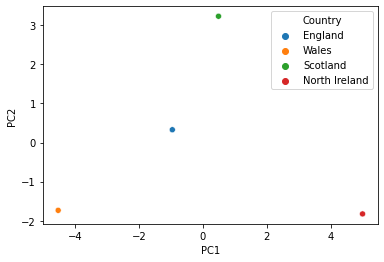

In [ ]:
import seaborn as sns

sns.scatterplot(x = 'PC1', y = 'PC2', data = pca_df, hue=country)

## **Part 3. Clustering**

### **3-1. K-Means Clustering**

아래 데이터에 대해 K-Means Clustering을 적용한 후, 그 결과를 seaborn 라이브러리의 `scatterplot`으로 시각화하세요.
- `n_clusters = 4`, `random_state = 42`를 제외한 다른 parameter는 default option을 사용합니다.
- `scatterplot`의 hue 파라미터를 설정하여, cluster 별로 데이터가 어디에 위치해 있는지 확인합니다.


##### **Q7. scatterplot에서 가장 우측 상단에 위치해 있는 cluster는 무엇인가요?**

In [ ]:
points = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/sc13x/data.csv')
points.head()

,x,y
0,-7.846803,-3.421277
1,-3.554323,-6.884729
2,-0.192822,-9.671030
3,-6.401456,-5.223972
4,-0.804026,-9.704457


In [ ]:
points.shape

(200, 2)

In [ ]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters = 4, random_state = 42)

kmeans = km.fit(points[['x','y']])
points['cluster_id'] = kmeans.labels_

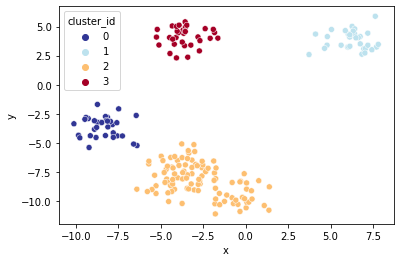

In [ ]:
sns.scatterplot(x = 'x', y = 'y', data = points, hue='cluster_id', palette='RdYlBu_r')

## **Part 4. 도전 과제**

위에서 요구된 사항들을 모두 정확하게 만족하였으며, 아래 **2개의 추가 조건들 중 하나**를 만족하는 경우 3점을 얻을 수 있습니다.

아래 요구사항들은 모두 **optional** 임을 다시 한 번 강조합니다. (필수 요구사항이 아닙니다.)



### **4-1. Scree plot** 




#### **`2-2-b.`에서 진행한 PCA 결과에 대해서 `Scree plot`을 추가하세요.**

[0.68327871 0.9319916  1.         1.        ]


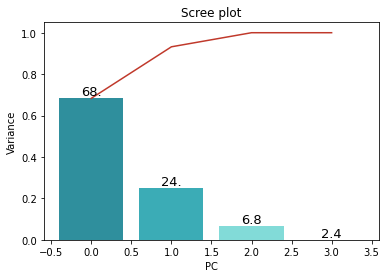

In [ ]:
import matplotlib.pyplot as plt

# Scree plot 생성 함수
def scree_plot(pca):
    num_components = len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
    
    ax = plt.subplot()
    cumvals = np.cumsum(vals)
    
    print(cumvals)
    
    ax.bar(ind, vals, color = ['#2F8F9D', '#3BACB6', '#82DBD8', '#B3E8E5']) # Bar plot
    ax.plot(ind, cumvals, color = '#c0392b') # Line plot 
    
    for i in range(num_components):
        ax.annotate(r"%s" % ((str(vals[i]*100)[:3])), (ind[i], vals[i]), va = "bottom", ha = "center", fontsize = 13)
     
    ax.set_xlabel("PC")
    ax.set_ylabel("Variance")
    plt.title('Scree plot')
    
scree_plot(pc)

### **4-2. Elbow Methods**



#### **Elbow Methods를 활용하여 `Part 3. Clustering`에서 최적의 k값을 선택하는 과정을 논리적으로 설명하세요.**


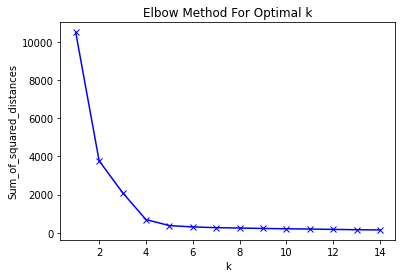

In [ ]:
# 7번에서 k값을 선택하는 과정 (Elbow methods 이용) https://m.blog.naver.com/PostView.nhn?blogId=samsjang&logNo=221017639342
import matplotlib.pyplot as plt
sum_of_squared_distances = []
K = range(1, 15)
for k in K:
    km = KMeans(n_clusters = k)
    km = km.fit(points)
    sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()